In [6]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
print("success4")

success4


success


In [4]:
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))


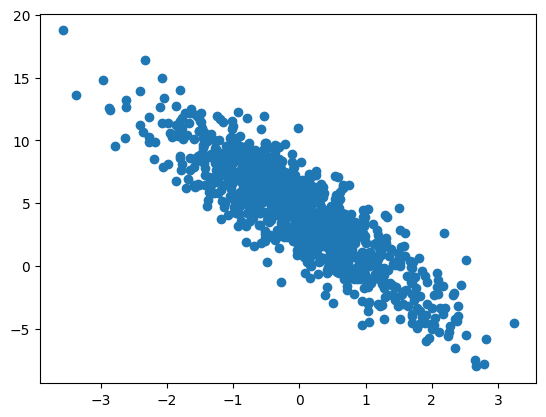

In [4]:
plt.scatter(features[:,1].numpy(),labels.numpy())
plt.show()

In [5]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)



In [6]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    print(X.size())
    break

tensor([[-0.7553,  1.7694],
        [-0.4865,  0.3525],
        [-0.7774, -1.0282],
        [ 0.5918, -0.0416],
        [ 1.9682,  0.2544],
        [-1.2656, -0.2035],
        [ 0.8304, -0.2056],
        [ 1.8981,  1.5934],
        [-0.1395,  1.1852],
        [-0.6048,  0.4953]], dtype=torch.float64) tensor([-3.3599,  2.0378,  6.1382,  5.5129,  7.2666,  2.3546,  6.5437,  2.5908,
        -0.1009,  1.2999], dtype=torch.float64)
torch.Size([10, 2])


In [7]:
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
b

tensor([0.], requires_grad=True)

In [8]:
def linreg(X,w,b):
    return torch.mm(X,w)+b
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2
def sgd(params,lr,batchsize):
    for param in params:
        param.data-=lr*param.grad/batch_size

In [ ]:
lr=0.03
num_epoches=10
net=linreg
loss=squared_loss
for epoch in range(num_epoches):
    for X,y in data_iter(batch_size,features,labels):
        # print(X.shape)
        # print(w.shape)
        # print(net(X,w,b))
        # loss(net(X,w,b),y).sum()
        # break
        l=loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l=loss(net(features,w,b),labels)
    print('epoch %d,loss %f'%(epoch+1,train_l.mean().item()))


In [ ]:
print(true_w, '\n', w)
print(true_b, '\n', b)

